In [4]:
import pandas as pd
from matplotlib import pyplot as plt

## Reading data

In [5]:
data_path = '../data/ads_dirty.csv'

columns = ['id','department_name', 'department_number', 'city_name',
           'title', 'ad_type', 'latitude', 'longitude',
           'price', 'area', 'available', 'furniture',
           'energy_DPE', 'energy_GES', 'description',
           'features', 'url']

df = pd.read_csv(data_path, names= columns)

In [6]:
df.head(2)

id department_name  department_number          city_name  \
0   1             ain                  1  Amberieu en Bugey   
1   2             ain                  1  Amberieu en Bugey   

                                               title      ad_type  latitude  \
0  Location Appartement sans vis-à-vis à Hautevil...  Appartement       NaN   
1  Location 3 pièces à Chazey sur Ain - 650 € - 4...          NaN       NaN   

   longitude  price  area      available furniture energy_DPE energy_GES  \
0        NaN  495.0  38.0  immédiatement      vide   en cours   en cours   
1        NaN  650.0  42.0  le 01/05/2024      vide          D          D   

                                         description  \
0  Ap.3eme étage immeuble Le plein Soleil. 1 séjo...   
1  Appartement de 42M2 à Chazey sur Ain. Utilisat...   

                                            features  \
0  Stationnement possible;Grand séjour;Cuisine éq...   
1          Stationnement possible;Balcon ou terrasse   

                                                 url  
0  https://www.locservice.fr/ain-01/location-appa...  
1  https://www.locservice.fr/ain-01/location-appa...

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10029 entries, 0 to 10028
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10029 non-null  int64  
 1   department_name    10029 non-null  object 
 2   department_number  10029 non-null  int64  
 3   city_name          10029 non-null  object 
 4   title              10029 non-null  object 
 5   ad_type            9010 non-null   object 
 6   latitude           8190 non-null   float64
 7   longitude          8190 non-null   float64
 8   price              10029 non-null  float64
 9   area               10029 non-null  float64
 10  available          10029 non-null  object 
 11  furniture          10029 non-null  object 
 12  energy_DPE         10029 non-null  object 
 13  energy_GES         10029 non-null  object 
 14  description        10029 non-null  object 
 15  features           9223 non-null   object 
 16  url                100

## Filling 'Ad_type' missing values

In [8]:
df['ad_type'].isna().sum()

1019

In [9]:
def fill_ad_type(row):
    # if the ad_type is not missing do nothing
    if not pd.isnull(row['ad_type']):
        return row
    if 'appartement' in row['title'].lower() or 'appartement' in row['description'].lower():
        row['ad_type'] = 'Appartement'
    elif 'maison' in row['title'].lower() or 'maison' in row['description'].lower():
        row['ad_type'] = 'Maison'
    elif 'studio' in row['title'].lower() or 'studio' in row['description'].lower():
        row['ad_type'] = 'Studio'
    elif 'chambre' in row['title'].lower() or 'chambre' in row['description'].lower():
        row['ad_type'] = 'Chambre'
    return row

In [10]:
df = df.apply(fill_ad_type, axis=1)
df['ad_type'].isna().sum()

96

## drop rows with missing values

In [11]:
df = df.dropna(subset=['latitude', 'longitude','features','ad_type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7524 entries, 3 to 10027
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7524 non-null   int64  
 1   department_name    7524 non-null   object 
 2   department_number  7524 non-null   int64  
 3   city_name          7524 non-null   object 
 4   title              7524 non-null   object 
 5   ad_type            7524 non-null   object 
 6   latitude           7524 non-null   float64
 7   longitude          7524 non-null   float64
 8   price              7524 non-null   float64
 9   area               7524 non-null   float64
 10  available          7524 non-null   object 
 11  furniture          7524 non-null   object 
 12  energy_DPE         7524 non-null   object 
 13  energy_GES         7524 non-null   object 
 14  description        7524 non-null   object 
 15  features           7524 non-null   object 
 16  url                7524 non-

## Convert 'Ad_type' to ordinal 

In [12]:
df['ad_type'].value_counts()

ad_type
Appartement    3933
Studio         2103
Chambre         977
Maison          511
Name: count, dtype: int64

In [13]:
# if Nan replace it with "missing"
df['ad_type'] = df['ad_type'].fillna("Missing")

def oridinal_ad_type(x):
    if x == 'Chambre':
        return 0
    elif x == 'Studio':
        return 1
    elif x == 'Appartement':
        return 2
    elif x == 'Maison':
        return 3

In [14]:
df['ad_type'] = df['ad_type'].apply(oridinal_ad_type)
df['ad_type'].value_counts()

ad_type
2    3933
1    2103
0     977
3     511
Name: count, dtype: int64

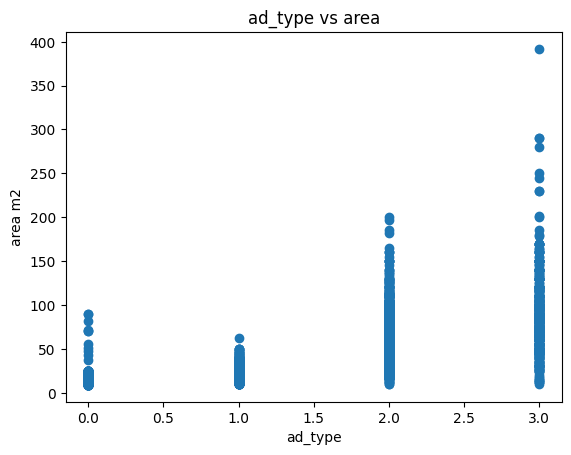

In [15]:
# plot ad_type with area
plt.scatter(df['ad_type'], df['area'])
plt.title('ad_type vs area')
plt.xlabel('ad_type')
plt.ylabel('area m2')
plt.show()

## Convert 'energy_DPE' and 'energy_GES'  to ordinal 

In [16]:
# count unique
df['energy_DPE'].value_counts()

energy_DPE
D           2096
C           1684
en cours    1190
E           1072
B            588
vierge       387
A            286
F            188
G             33
Name: count, dtype: int64

In [17]:
df['energy_GES'].value_counts()


energy_GES
en cours    1706
C           1540
D           1291
B           1275
E            562
vierge       556
A            475
F            106
G             13
Name: count, dtype: int64

In [18]:
def clean_energy(x):
    if x == 'A':
        return 1
    elif x == 'B':
        return 2
    elif x == 'C':
        return 3
    elif x == 'D':
        return 4
    elif x == 'E':
        return 5
    elif x == 'F':
        return 6
    elif x == 'G':
        return 7
    else:
        return 4

df['energy_DPE'] = df['energy_DPE'].apply(clean_energy)
df['energy_GES'] = df['energy_GES'].apply(clean_energy)  

## Convert 'furniture' to one hot encoding 

In [19]:
def clean_furniture(x):
    if x == 'meublé' or x =='meublée':
        return 'furnished'
    elif x == 'vide':
        return 'empty'
    elif x == 'vide ou meublé' or x == 'vide ou meublée':
        return 'both'
    
df['furniture'] = df['furniture'].apply(clean_furniture)

forniture_set = df['furniture'].unique()
forniture_set

array(['furnished', 'empty', 'both'], dtype=object)

In [20]:
for feature in forniture_set:
    df[feature] = df['furniture'].apply(lambda x: 1 if feature in x else 0)

In [21]:
df[forniture_set].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('Number of ads per furniture type')
plt.ylabel('Number of ads')
plt.xlabel('Feature')
plt.show()

## Creating one hot encoding columns for 'features'

In [22]:
df['features'].iloc[0]

'Stationnement possible;Cuisine équipée;Sans vis à vis'

In [23]:
features_set = set()
for row in df['features']:
    features = row.split(';')
    for feature in features:
        features_set.add(feature)
features_set.remove('')
features_set.remove("Aux bâtiments qui, en raison de leurs contraintes techniques, architecturales ou patrimoniales, ne peuvent faire l'objet de travaux de rénovation permettant d'atteindre une consommation inférieure au seuil mentionné ci-dessus ")
features_set.remove('Aux bâtiments pour lesquels le coût des travaux permettant de satisfaire cette obligation est manifestement disproportionné par rapport à la valeur du bien.')
features_set = list(features_set)

In [24]:
features_set

['Stationnement possible',
 'Toilettes indépendantes',
 'Salle de bains privative',
 'Dernier étage',
 'Plain pied',
 'Cuisine équipée',
 'Sans vis à vis',
 'Cave ou local',
 'Internet inclus',
 'Toilettes privatives',
 'Balcon ou terrasse',
 'Grand séjour',
 'Cuisine possible',
 'Garage',
 'Baignoire',
 'Proximité transport',
 'Proximité commerces',
 'Jardin',
 'Plusieurs salles de bains',
 'Cuisine indépendante',
 'Ascenseur']

In [25]:
# Create a column for each feature
for feature in features_set:
    df[feature] = df['features'].apply(lambda x: 1 if feature in x else 0)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7524 entries, 3 to 10027
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7524 non-null   int64  
 1   department_name            7524 non-null   object 
 2   department_number          7524 non-null   int64  
 3   city_name                  7524 non-null   object 
 4   title                      7524 non-null   object 
 5   ad_type                    7524 non-null   int64  
 6   latitude                   7524 non-null   float64
 7   longitude                  7524 non-null   float64
 8   price                      7524 non-null   float64
 9   area                       7524 non-null   float64
 10  available                  7524 non-null   object 
 11  furniture                  7524 non-null   object 
 12  energy_DPE                 7524 non-null   int64  
 13  energy_GES                 7524 non-null   int64  
 

In [27]:
# plot histogram of the number of features
df[features_set].sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))
plt.title('Number of ads per feature')
plt.ylabel('Number of ads')
plt.xlabel('Feature')
plt.show()

## Drop columns that are not useful for prediction or analysis

In [28]:
# drop columns that are not useful

df_clean = df.drop(columns=['title','available', 'furniture',  'description', 'features', 'url',])


In [29]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7524 entries, 3 to 10027
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7524 non-null   int64  
 1   department_name            7524 non-null   object 
 2   department_number          7524 non-null   int64  
 3   city_name                  7524 non-null   object 
 4   ad_type                    7524 non-null   int64  
 5   latitude                   7524 non-null   float64
 6   longitude                  7524 non-null   float64
 7   price                      7524 non-null   float64
 8   area                       7524 non-null   float64
 9   energy_DPE                 7524 non-null   int64  
 10  energy_GES                 7524 non-null   int64  
 11  furnished                  7524 non-null   int64  
 12  empty                      7524 non-null   int64  
 13  both                       7524 non-null   int64  
 

In [30]:
df_clean.to_csv('../data/ads_clean.csv', index=False)

In [31]:

df_clean.shape


(7524, 35)

In [32]:
from utils import create_table_ads_clean, select_all_ads, insert_ad

In [33]:
create_table_ads_clean()

PostgreSQL connection is closed


In [35]:
for i, row in df_clean.iloc[2:].iterrows():
    insert_ad(row)

PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreSQL connection is closed
PostgreS

In [36]:
rows = select_all_ads(save=True)

PostgreSQL connection is closed
